In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [4]:
boston_df.head(15)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


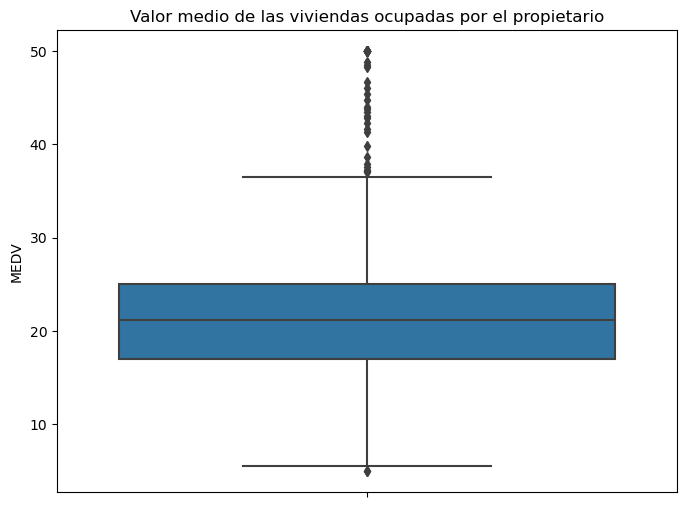

In [5]:
# Diagrama de caja para el valor medio de las viviendas ocupadas por el propietario (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(data=boston_df, y='MEDV')
plt.title('Valor medio de las viviendas ocupadas por el propietario')
plt.show()

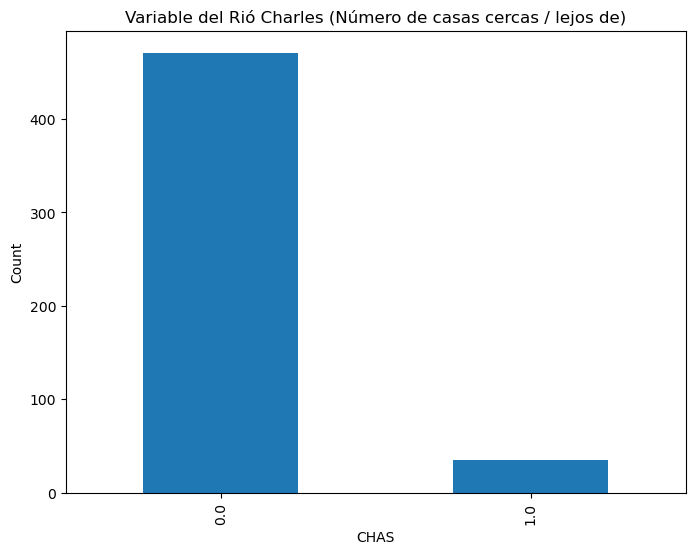

In [6]:
# Gráfico de barras para la variable del río Charles (CHAS)
plt.figure(figsize=(8, 6))
boston_df['CHAS'].value_counts().plot(kind='bar')
plt.title('Variable del Rió Charles (Número de casas cercas / lejos de)')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.show()

In [7]:
# Discretizar la variable de edad (AGE) en tres grupos
bins = [0, 35, 70, float('inf')]
labels = ['<=35', '35-70', '>70']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

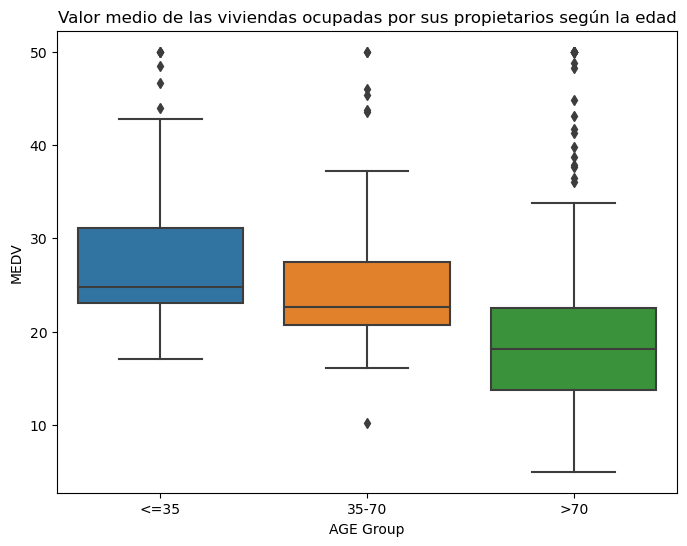

In [8]:
# Diagrama de caja para MEDV frente a AGE_Group
plt.figure(figsize=(8, 6))
sns.boxplot(data=boston_df, x='AGE_Group', y='MEDV')
plt.title('Valor medio de las viviendas ocupadas por sus propietarios según la edad')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

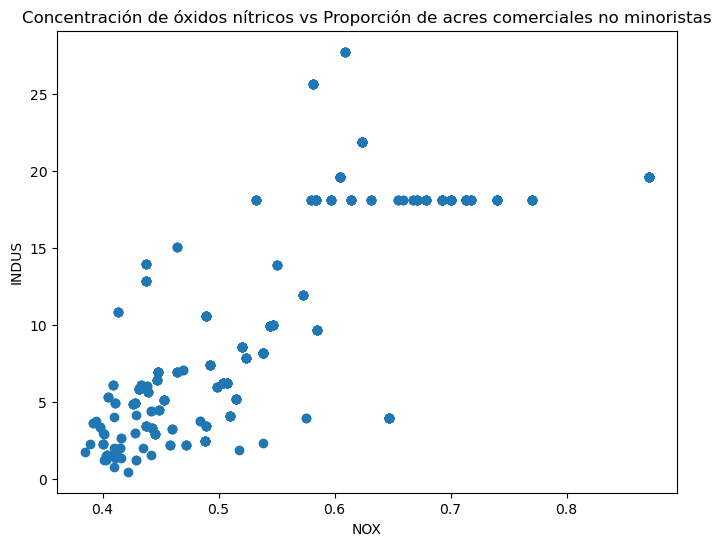

In [9]:
# Diagrama de dispersión para NOX y proporción de acres comerciales no minoristas (INDUS)
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.title('Concentración de óxidos nítricos vs Proporción de acres comerciales no minoristas')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.show()

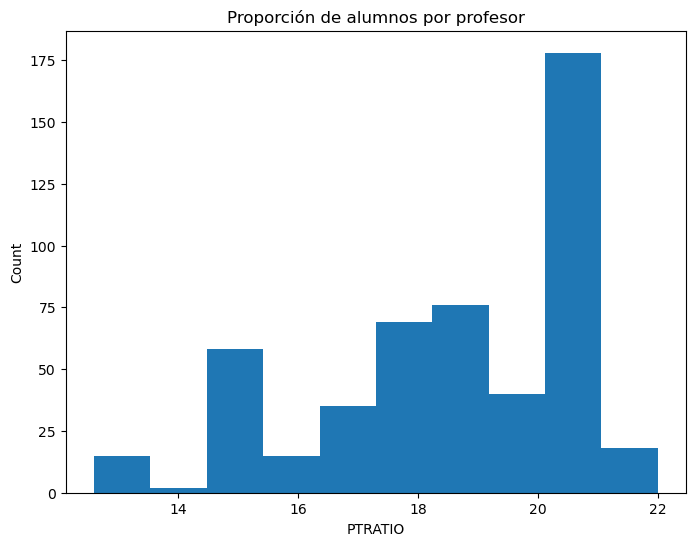

In [10]:
# Histograma para la variable de proporción de alumnos por profesor (PTRATIO)
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10)
plt.title('Proporción de alumnos por profesor')
plt.xlabel('PTRATIO')
plt.ylabel('Count')
plt.show()


In [11]:
# Prueba T para muestras independientes para comparar el valor medio de las casas delimitadas por el río Charles o no
charles_houses = boston_df[boston_df['CHAS'] == 1]['MEDV']
non_charles_houses = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_statistic, p_value = stats.ttest_ind(charles_houses, non_charles_houses)
alpha = 0.05

In [12]:
print("Prueba T para muestras independientes:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Prueba T para muestras independientes:
T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [13]:
if p_value < alpha:
    print("Conclusión: Hay diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")
else:
    print("Conclusión: No hay diferencia significativa en el valor medio de las casas delimitadas por el río Charles.")

Conclusión: Hay diferencia significativa en el valor medio de las casas delimitadas por el río Charles.


In [14]:
# ANOVA para comparar los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por el propietario construidas antes de 1940 (AGE)
groups = [group['MEDV'] for name, group in boston_df.groupby('AGE_Group')]
f_statistic, p_value = stats.f_oneway(*groups)

In [15]:
print("\nANOVA:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


ANOVA:
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


In [16]:
if p_value < alpha:
    print("Conclusión: Existe diferencia significativa en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por el propietario construidas antes de 1940.")
else:
    print("Conclusión: No existe diferencia significativa en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por el propietario construidas antes de 1940.")


Conclusión: Existe diferencia significativa en los valores medios de las casas (MEDV) para cada proporción de unidades ocupadas por el propietario construidas antes de 1940.


In [17]:
# Correlación de Pearson entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas
pearson_corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

In [18]:
print("\nCorrelación de Pearson:")
print(f"Pearson correlation coefficient: {pearson_corr}")
print(f"P-value: {p_value}")


Correlación de Pearson:
Pearson correlation coefficient: 0.7636514469209151
P-value: 7.913361061238693e-98


In [19]:
if p_value < alpha:
    print("Conclusión: Existe una correlación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas.")
else:
    print("Conclusión: No existe una correlación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas.")

Conclusión: Existe una correlación significativa entre las concentraciones de óxido nítrico y la proporción de acres comerciales no minoristas.


In [20]:
# Análisis de regresión para la distancia ponderada adicional a los cinco centros de empleo de Boston y el valor medio de las viviendas ocupadas por sus propietarios
slope, intercept, r_value, p_value, std_err = stats.linregress(boston_df['DIS'], boston_df['MEDV'])

In [21]:
print("\nAnálisis de regresión:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")


Análisis de regresión:
Slope: 1.0916130158411093
Intercept: 18.390088330493384
R-value: 0.2499287340859039
P-value: 1.2066117273371223e-08
Standard Error: 0.18837841478683098
